# Airbnb on residential communities in Singapore

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
import geopandas as gpd
from datetime import datetime
from wordcloud import WordCloud, ImageColorGenerator

In [2]:
if os.path.isfile("Singapore_listings.csv"):
    filepath = "Singapore_listings.csv"
else:
    filepath = "http://data.insideairbnb.com/singapore/sg/singapore/2021-03-25/visualisations/listings.csv"

airbnb_sg = pd.read_csv(filepath)

In [3]:
singapore_map = gpd.read_file("Region_Census2010.shp")
singapore_map = singapore_map.to_crs("epsg:4326")

In [4]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (13, 7)

In [5]:
airbnb_sg.drop(["id","name","host_id","minimum_nights","calculated_host_listings_count","availability_365"],axis=1,inplace=True)
airbnb_sg.fillna(0,inplace=True)

In [6]:
airbnb_sg.head()

,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,last_review,reviews_per_month
0,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,81,1,2013-10-21,0.01
1,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,80,18,2014-12-26,0.21
2,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,67,20,2015-10-01,0.17
3,Belinda,East Region,Tampines,1.34541,103.95712,Private room,177,20,2020-01-17,0.18
4,Belinda,East Region,Tampines,1.34567,103.95963,Private room,81,24,2019-10-13,0.20


In [7]:
airbnb_sg.columns

Index(['host_name', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'number_of_reviews', 'last_review',
       'reviews_per_month'],
      dtype='object')

In [8]:
airbnb_sg.iloc[0]

host_name                 Francesca
neighbourhood_group    North Region
neighbourhood             Woodlands
latitude                    1.44255
longitude                  103.7958
room_type              Private room
price                            81
number_of_reviews                 1
last_review              2013-10-21
reviews_per_month              0.01
Name: 0, dtype: object

# Neighbourhood Groups

In [9]:
airbnb_sg["neighbourhood_group"].value_counts()

Central Region       3547
East Region           278
West Region           265
North-East Region     163
North Region          135
Name: neighbourhood_group, dtype: int64

In [10]:
def listings_in_different_neighbourhood_groups():
    airbnb_sg["neighbourhood_group"].value_counts().plot(kind="pie", autopct="%1.2f%%")
    plt.title("Listings in Different Neighbourhood Groups", fontsize=18)
    plt.ylabel("")
    return plt.show()

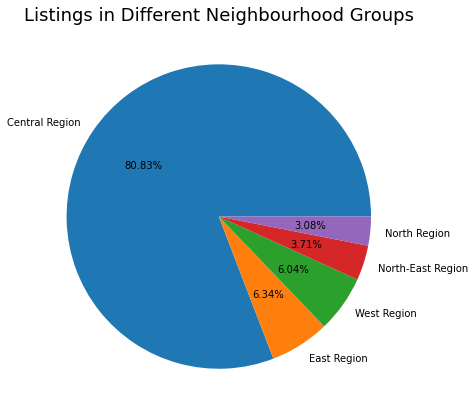

In [11]:
listings_in_different_neighbourhood_groups()

In [12]:
for name, df in airbnb_sg.groupby("neighbourhood_group"):
    print(name, df.host_name.value_counts().index[:3])

Central Region Index(['Fiona', 'Kaurus', 'Jay'], dtype='object')
East Region Index(['Katherine', 'Wei', 'RedDoorz'], dtype='object')
North Region Index(['Property', 'Gopal', 'Brandon'], dtype='object')
North-East Region Index(['诺', 'Angie Anqi', 'Markus'], dtype='object')
West Region Index(['Fiona', 'Jay', 'Lee'], dtype='object')


In [13]:
def top_3_hosts_in_different_neighbourhoood_groups():
    plt.rcParams["font.family"]="Microsoft YaHei"
    bar_colors=["blue","blue","blue","orange","orange","orange","green","green","purple","green","red","purple","purple","red","red"]
    airbnb_sg[["host_name", "neighbourhood_group"]].value_counts().groupby("neighbourhood_group").head(3).plot(kind="bar",color=bar_colors)
    legend_colors={"Central Region":"blue","East Region":"orange","West Region":"green","North Region":"purple","North-East Region":"red"}
    labels=list(legend_colors.keys())
    plt.legend([plt.Rectangle((0,0),1,1, color=legend_colors[label]) for label in labels],labels,title="Neighbourhood Group")
    plt.title("Top 3 Hosts in Different Neighbourhood Groups")
    plt.xlabel("Host Name, Neighbourhood Group")
    plt.ylabel("Number of Listings")
    return plt.show()

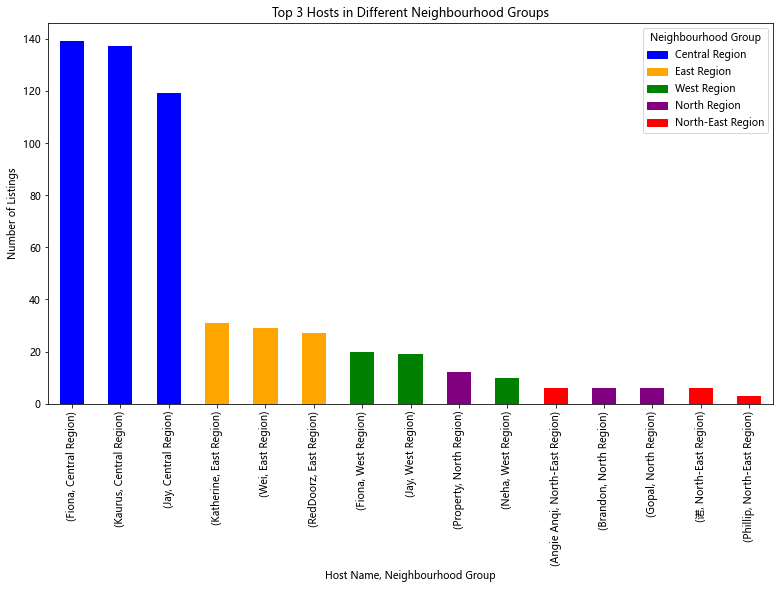

In [14]:
top_3_hosts_in_different_neighbourhoood_groups()

In [15]:
def top_3_hosts_with_most_listings():
    airbnb_sg["host_name"].value_counts().head(3).plot(kind="bar")
    plt.title("Top 3 Hosts with Most Listings")
    plt.xlabel("Host Name")
    plt.ylabel("Number of Listings")
    return plt.show()

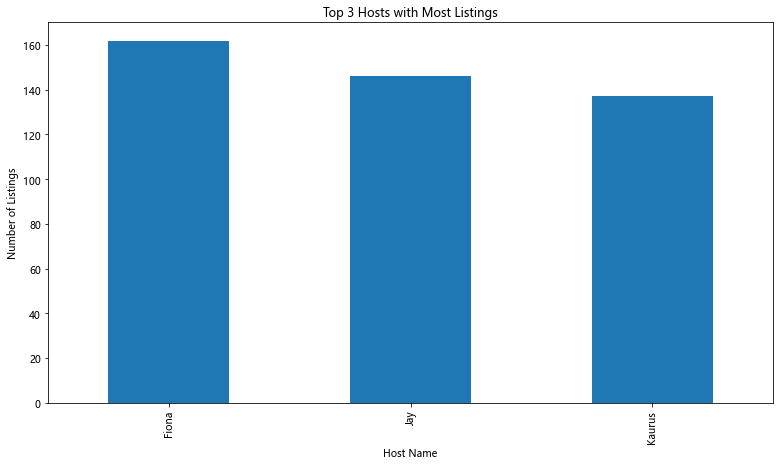

In [16]:
top_3_hosts_with_most_listings()

# Listings in Different Room Types

In [17]:
airbnb_sg["room_type"].value_counts()

Private room       2101
Entire home/apt    1848
Hotel room          251
Shared room         188
Name: room_type, dtype: int64

In [18]:
def room_types_pie():
    airbnb_sg["room_type"].value_counts().plot(kind="pie", autopct="%1.2f%%")
    plt.title("Room Types")
    plt.ylabel("")
    return plt.show()

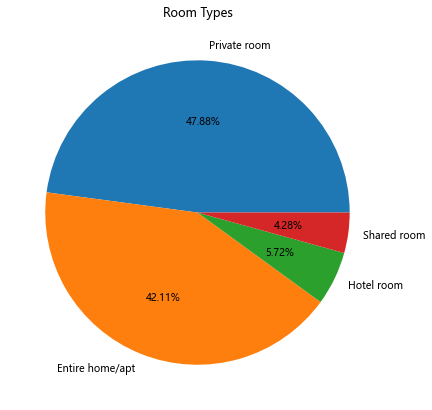

In [19]:
room_types_pie()

# Total Price of Different Room Types

In [20]:
airbnb_sg.groupby("room_type")["price"].sum().sort_values()

room_type
Shared room         17505
Hotel room          27906
Private room       226923
Entire home/apt    423114
Name: price, dtype: int64

# Mean of the Price for Different Room Types in Different Neighbourhood Groups

In [21]:
airbnb_sg.groupby(["neighbourhood_group","room_type"])["price"].mean()

neighbourhood_group  room_type      
Central Region       Entire home/apt    213.703904
                     Hotel room         110.854839
                     Private room       112.612051
                     Shared room         90.286624
East Region          Entire home/apt    410.137255
                     Hotel room         138.000000
                     Private room       121.986175
                     Shared room        249.142857
North Region         Entire home/apt    206.846154
                     Private room        75.937500
                     Shared room         74.600000
North-East Region    Entire home/apt    354.628571
                     Private room        81.258065
                     Shared room        101.500000
West Region          Entire home/apt    372.369048
                     Private room        90.894737
                     Shared room         43.400000
Name: price, dtype: float64

In [22]:
def room_type_in_different_neighbourhood_groups():
    plt.title("Room Type in Different Neighbourhood Groups")
    sns.countplot(x=airbnb_sg.neighbourhood_group,hue=airbnb_sg.room_type)
    plt.legend(loc="upper right",title="Room Type")
    plt.xlabel("Neighbourhood Group")
    plt.ylabel("Count")
    return plt.show()

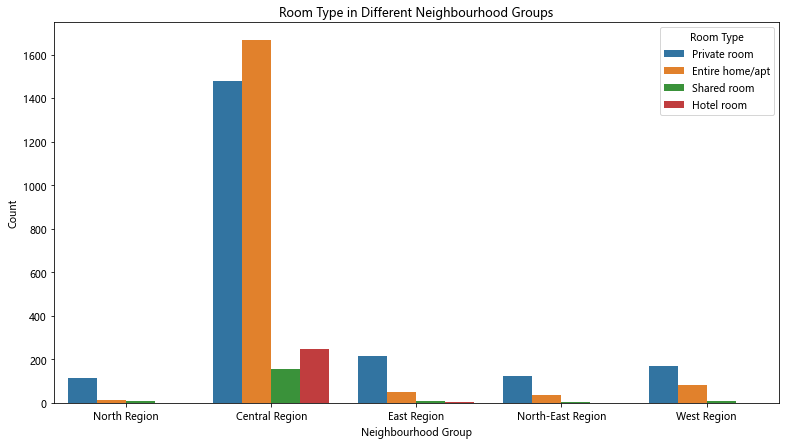

In [23]:
room_type_in_different_neighbourhood_groups()

In [24]:
def price_distribution_in_neighbourhood_groups_below_400():
    airbnb_sg_price_400 = airbnb_sg[airbnb_sg.price < 400]
    plt.title("Price Distribution in Different Neighbourhood Groups below $400")
    sns.boxplot(data=airbnb_sg_price_400,x="neighbourhood_group",y="price")
    plt.xlabel("Neighbourhood Group")
    plt.ylabel("Price")
    return plt.show()

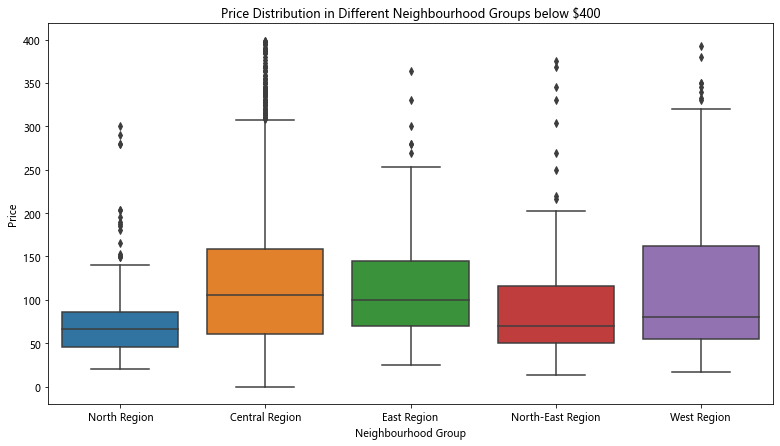

In [25]:
price_distribution_in_neighbourhood_groups_below_400()

In [26]:
def map_of_price_distribution():
    fig,ax = plt.subplots(figsize=(13,7))
    singapore_map.plot(edgecolor='k',alpha=0.2,ax=ax,cmap="plasma")
    airbnb_sg.plot(kind="scatter",x="longitude",y="latitude",c="price",cmap=plt.get_cmap("jet"),alpha=0.5,ax=ax)
    plt.title("Map of Price Distribution")
    plt.xlabel("longitude")
    plt.ylabel("latitude")
    return plt.show()

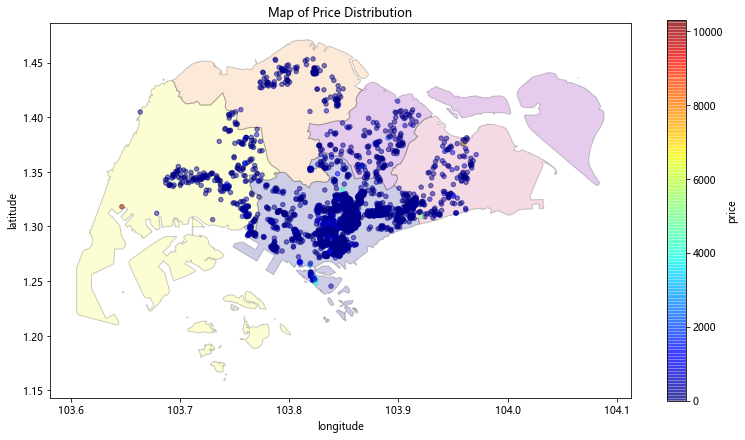

In [27]:
map_of_price_distribution()

# Top 10 High Price Listings 

In [28]:
airbnb_sg.nlargest(10,"price")

,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,last_review,reviews_per_month
1228,0,West Region,Tuas,1.31800,103.64687,Entire home/apt,10286,5,2017-10-31,0.12
730,Michael,East Region,Pasir Ris,1.37622,103.96014,Entire home/apt,7286,5,2018-09-29,0.09
570,Yin,Central Region,Outram,1.28348,103.84135,Private room,7000,5,2017-12-12,0.11
2618,Jonathan,East Region,Bedok,1.30909,103.92122,Entire home/apt,5000,0,0,0.00
2013,Kim (金),Central Region,Kallang,1.31208,103.85536,Entire home/apt,4311,0,0,0.00
871,Lin,Central Region,Toa Payoh,1.33353,103.84916,Private room,4000,0,0,0.00
3870,Fiona,Central Region,Southern Islands,1.24798,103.82435,Entire home/apt,4000,0,0,0.00
596,Seven,Central Region,Kallang,1.30909,103.85881,Shared room,3770,0,0,0.00
2183,Fiona,Central Region,Southern Islands,1.25091,103.82466,Entire home/apt,3300,0,0,0.00
996,Amara Sanctuary,Central Region,Southern Islands,1.25300,103.82276,Entire home/apt,3000,0,0,0.00


# Top 10 Popular Listings

In [29]:
airbnb_sg.nlargest(10,"number_of_reviews")

,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,last_review,reviews_per_month
89,Shirley,East Region,Bedok,1.32122,103.91492,Entire home/apt,115,370,2020-03-31,4.22
547,Yuan,Central Region,Toa Payoh,1.33514,103.87622,Private room,50,354,2020-04-02,5.73
140,Callie & Kel,Central Region,Singapore River,1.29331,103.83167,Entire home/apt,130,312,2020-03-16,3.99
236,Eddie,East Region,Tampines,1.34463,103.96107,Private room,60,296,2019-06-28,4.08
210,Studios,Central Region,Rochor,1.30386,103.85459,Entire home/apt,75,291,2021-02-13,3.93
122,RecR,Central Region,River Valley,1.29533,103.83797,Entire home/apt,160,288,2021-01-03,3.63
235,Eddie,East Region,Tampines,1.34495,103.96043,Private room,70,285,2019-07-12,3.96
625,Sk,Central Region,Kallang,1.30466,103.86193,Private room,64,273,2021-02-17,5.42
219,Anita & David,Central Region,Novena,1.31950,103.84791,Private room,102,266,2020-02-15,3.62
305,Joey,Central Region,Rochor,1.30089,103.84647,Private room,100,262,2020-03-05,3.76


# Listings in Different Neighbourhoods

In [30]:
new_list = []

for string in list(airbnb_sg.neighbourhood):
    new = string.replace(" ","_")
    new_list.append(new)

text = " ".join(new_list)

def listings_in_different_neighbourhoods():
    plt.imshow(WordCloud(background_color="white",collocations=False).generate(text))
    plt.axis("off")
    return plt.show(close=None, block=None)

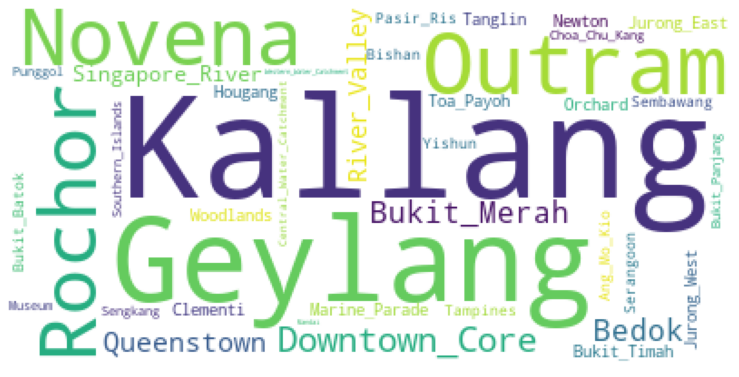

In [31]:
listings_in_different_neighbourhoods()